<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/Superposition_and_Entanglement_IonQCloud_Qiskit_ionq_provider_20241201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python3 -m pip install qiskit[visualization]
!python3 -m pip install qiskit-ionq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.7 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=1215f19e8f4fb58a85ddc04f0b00e89644f33dcf0e7d89823d77cb541ab38460
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
%pip show qiskit
%pip show qiskit-ionq

Name: qiskit
Version: 1.3.0
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-ionq
Name: qiskit-ionq
Version: 0.5.8
Summary: Qiskit provider for IonQ backends
Home-page: https://github.com/qiskit-partners/qiskit-ionq
Author: IonQ
Author-email: info@ionq.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: decorator, importlib-metadata, python-dotenv, qiskit, requests, retry
Required-by: 


In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

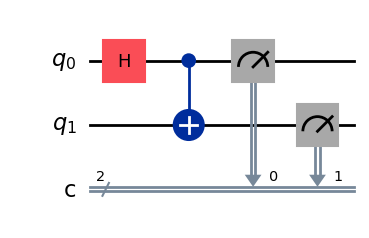

In [6]:
circuit.draw('mpl')

In [7]:
# IonQ H/W Cloud를 사용하기 위한 준비
from qiskit_ionq import IonQProvider

# IonQ Cloud 서비스 사용하기 위한 준비
ionq_provider = IonQProvider("") #IonQ Cloud에서 Access Key를 복사해 넣어야 합니다.

# 백엔드 리스트 출력
print("Available backends:")

for backend in ionq_provider.backends():
  print(backend.name())
###for

Available backends:
ionq_simulator
ionq_qpu


/usr/local/lib/python3.10/dist-packages/qiskit_ionq/helpers.py:563: UserWarning: Unable to get qubit count for simulator: 'qubits'. Defaulting to 100.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/qiskit_ionq/helpers.py:563: UserWarning: Unable to get qubit count for ionq_qpu: 'qubits'. Defaulting to 100.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/qiskit_ionq/helpers.py:563: UserWarning: Unable to get qubit count for ionq_qpu.aria-1: 'qubits'. Defaulting to 100.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/qiskit/providers/backend_compat.py:142: RuntimeWarning: No gate definition for mcx_gray can be found and is being excluded from the generated target. You can use `custom_name_mapping` to provide a definition for this operation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/qiskit/providers/backend_compat.py:142: RuntimeWarning: No gate definition for mcp can be found and is being excluded from the generated target. You can use `custom_name_mapping` to provide a definition for this operation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/qiskit/providers/backend_compat.py:142: RuntimeWarning: No gate definition for mcx can be found and is being excluded from the generated target. You can use `custom_name_mapping` to provide a definition for this operation

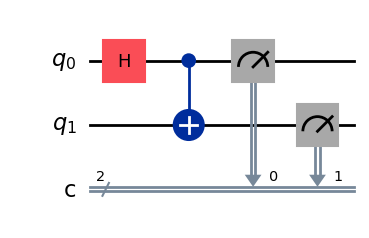

In [10]:
#여러 장치들에게 선택적으로 수행시키기 위한 준비
from qiskit.compiler import transpile, assemble
#
#백엔드들을 이용한 실제 장치나 시뮬레이터를 이용한 실행
#
#backend = ionq_provider.get_backend('ionq_simulator')
backend = ionq_provider.get_backend('qpu.aria-1')

#양자컴 하드웨어마다 지원할 수 있는 Gate의 종류가 달라서, 일반GATE를 각 하드웨어 지원 Gate로 변환하는 과정을 Transpile이라 한다.
trans_qc = transpile(circuit, backend)
trans_qc.draw('mpl')

In [12]:
from qiskit.providers.jobstatus import JobStatus
import time

job = backend.run(trans_qc, shots=1024)
#job = backend.run(qc, shots=2048) # if you don’t pass a shots kwarg, it defaults to 1024

print("Job ID is", job.job_id(),"\n")

# 제출된 잡에 대한 실행 상태 확인
#while job.status() is not JobStatus.DONE:
#	print("Job status is", job.status() )
#	time.sleep(60)
###while


Job ID is db729200-38e1-47db-b5d0-8efcae4228b4 



In [23]:
# grab a coffee! This can take up to a few minutes.
# once we break out of that while loop, we know our job is finished
print("Job status is", job.status() )

Job status is JobStatus.DONE


In [ ]:
# Retrieve the job
#job = backend.retrieve_job(job_id)

In [24]:
# 결과 출력
counts = job.result().get_counts()
print(counts)

{'00': 492, '11': 455, '10': 38, '01': 40}


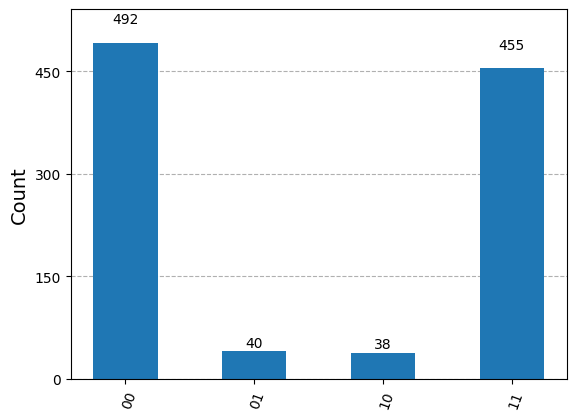

In [25]:
from qiskit.visualization import plot_histogram
plot_histogram(data=counts)